In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from math import sqrt
import scipy.stats

In [2]:
#Gustavo/data/Para_juntar

df=pd.read_csv('data/Grande_Base_4.csv',encoding='latin1')

In [3]:
df.head()

,CD_PROGRAMA_IES,AN_BASE,CD_AREA_AVALIACAO,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,...,CD_CONCEITO_PROGRAMA,UF_NM_MODALIDADE_PROGRAMA,UF_Qtd_Proj,UF_Outros projetos,UF_Qtd_Financiamentos,UF_BOLSA,UF_OUTRO AUXILIO FINANCEIRO,SEM AUXILIO,UF_DS_DEPENDENCIA_ADMINISTRATIVA,UF_QTD_FINANCIADORES
0,10001018002P1,2013,9,25,10,15,25,0,16,9,...,3,1,19,2.0,16,1.0,15.0,0.0,1,3
1,10001018002P1,2014,9,22,8,14,22,0,16,6,...,3,1,26,3.0,20,1.0,19.0,0.0,1,3
2,10001018002P1,2015,9,22,8,14,22,0,15,5,...,3,1,26,3.0,19,1.0,18.0,0.0,1,3
3,10001018002P1,2016,9,20,7,13,20,0,14,4,...,3,1,40,5.0,32,2.0,30.0,0.0,1,4
4,10001018002P1,2017,9,22,8,14,22,0,16,4,...,4,1,68,7.0,58,6.0,52.0,0.0,1,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20141 entries, 0 to 20140
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CD_PROGRAMA_IES                   20141 non-null  object 
 1   AN_BASE                           20141 non-null  int64  
 2   CD_AREA_AVALIACAO                 20141 non-null  int64  
 3   IB_Total_docentes                 20141 non-null  int64  
 4   IB_Mulheres                       20141 non-null  int64  
 5   IB_Homens                         20141 non-null  int64  
 6   IB_Brasileiros                    20141 non-null  int64  
 7   IB_Estrangeiros                   20141 non-null  int64  
 8   IB_QTDE_Regime_Parcial            20141 non-null  int64  
 9   IB_QTDE_Regime_Integral           20141 non-null  int64  
 10  IB_QTDE_Regime_Exclusivo          20141 non-null  int64  
 11  IB_QTDE_Prof_Doutor               20141 non-null  int64  
 12  IB_Q

In [5]:
#tirando os valores nulos

print(len(df))
df=df.dropna()
print(len(df))

20141
18797


# Clusterização

In [6]:
x=df.iloc[:,np.r_[3:21,24:29,30:41,42,46:55]]

In [7]:
#botando em escala

scaler = StandardScaler().fit(x)
x=scaler.transform(x)

### Demora rodar esses testes de número ideal de clusters

Resolvi ultilizar 4 clusters

In [8]:
km=KMeans(n_clusters=4,random_state=0)
pred=km.fit_predict(x)
df['Cluster']=pred

In [9]:
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df2=df[df.Cluster==2]
df3=df[df.Cluster==3]

In [10]:
regiao=list(df.groupby('NM_REGIAO').mean().index)

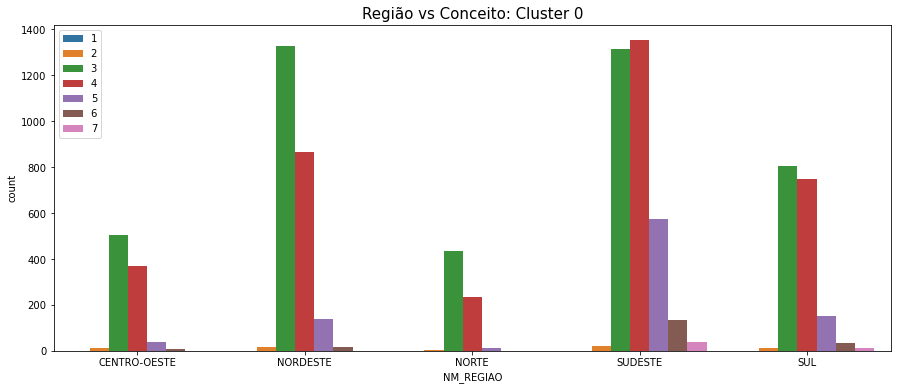

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(x='NM_REGIAO',data=df0,hue='CD_CONCEITO_PROGRAMA',order=regiao)
plt.title('Região vs Conceito: Cluster 0',size=15)
plt.legend(loc='upper left')

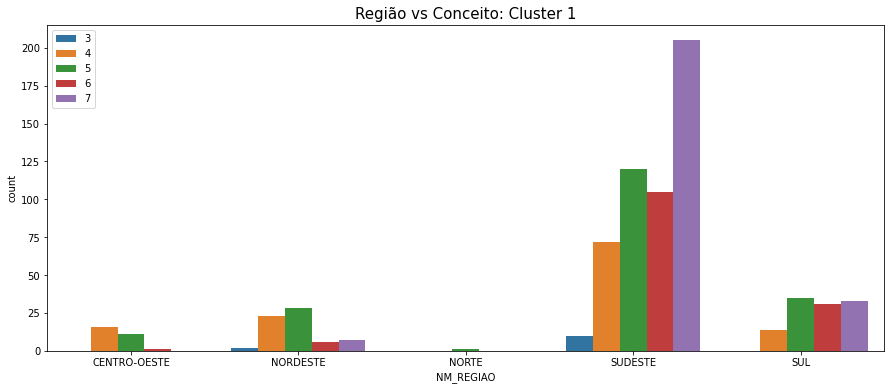

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(x='NM_REGIAO',data=df1,hue='CD_CONCEITO_PROGRAMA',order=regiao)
plt.title('Região vs Conceito: Cluster 1',size=15)
plt.legend(loc='upper left')

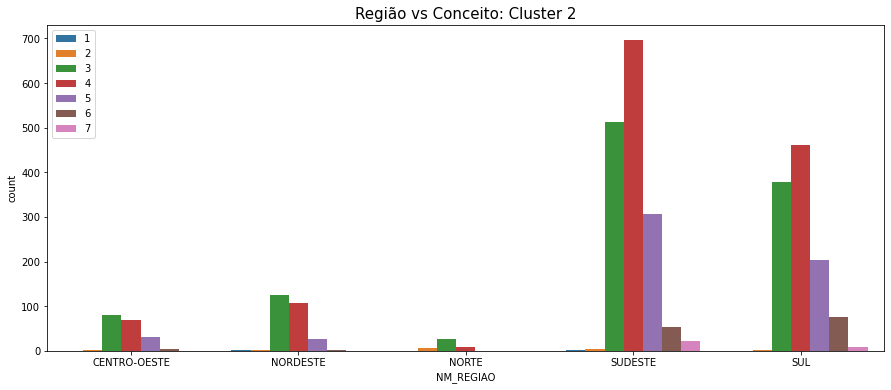

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(x='NM_REGIAO',data=df2,hue='CD_CONCEITO_PROGRAMA',order=regiao)
plt.title('Região vs Conceito: Cluster 2',size=15)
plt.legend(loc='upper left')

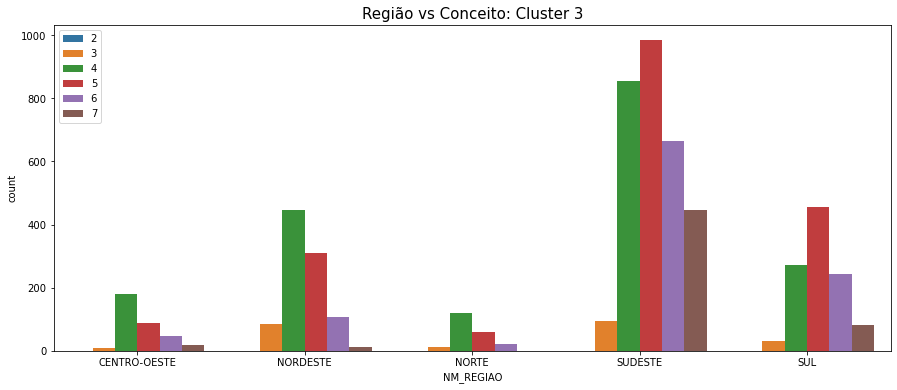

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(x='NM_REGIAO',data=df3,hue='CD_CONCEITO_PROGRAMA',order=regiao)
plt.title('Região vs Conceito: Cluster 3',size=15)
plt.legend(loc='upper left')

    O Cluster 0 parece ser o mais "democrático". É o cluster onde as outras regiões não são tão ofuscadas pela Sudeste.
    Já o Cluster 1 é o mais "exclusivo". Regiões menos austrais são quase que totalmente apagadas, com a Norte praticamente não existindo.
    O Cluster 2 se mostra mais como um cluster _sulista_, com presença massiva das regiões Sul e Sudeste

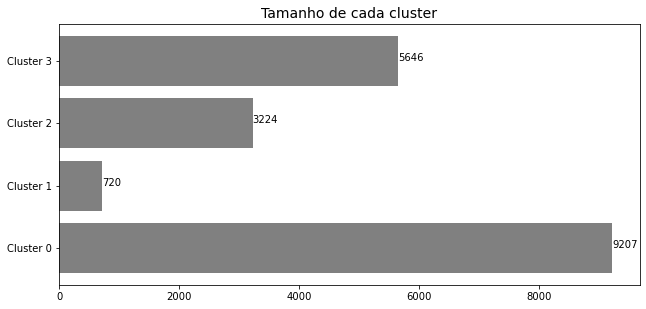

In [15]:
#tamanho de cada cluster
plt.figure(figsize=(10.4, 4.8))

barras = ['Cluster 0','Cluster 1', 'Cluster 2', 'Cluster 3']
altura = [len(df0),len(df1),len(df2),len(df3)]

plt.barh(barras, altura,color='grey')
plt.title("Tamanho de cada cluster",size='14')
for index, value in enumerate(altura):
    plt.text(value, index, str(value))

In [16]:
def plotbarras(feature,titulo=''):
    barras = ['Cluster 0','Cluster 1', 'Cluster 2', 'Cluster 3']
    altura = [df0[feature].mean(),df1[feature].mean(),
         df2[feature].mean(),df3[feature].mean()]

    plt.barh(barras, altura,color='grey')
    plt.title(titulo,size='14')
    for index, value in enumerate(altura):
        plt.text(value, index, str(f"{value:.2f}"))

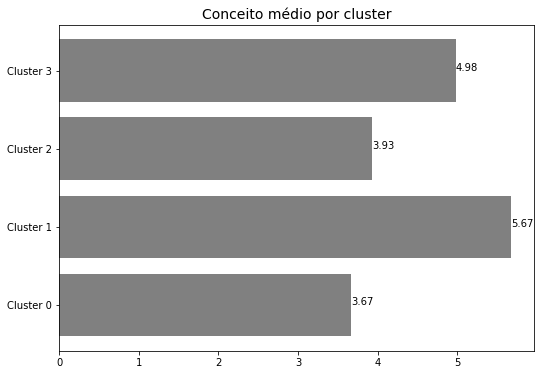

In [17]:
plt.figure(figsize=(8.5, 6))
plotbarras('CD_CONCEITO_PROGRAMA',"Conceito médio por cluster")

    É possível perceber que o Cluster 1 é o menor em tamanho mas o maior em nota. Isso o torna um tipo de 
    "elite" dos cursos de pós-graduação

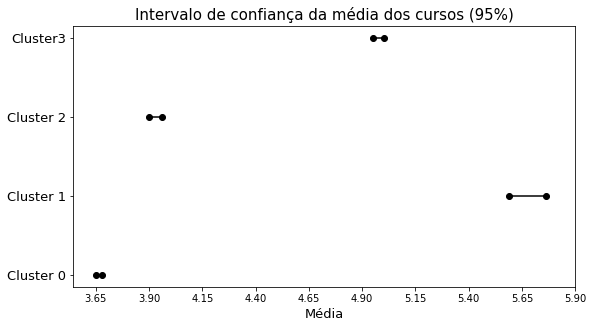

In [18]:
# Fonte: https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

def IC(data, confidence=0.95):
    '''Intervalo de confiança da média.
        Retorna a média, intervalo inferior e intervalo superior.'''
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return np.array([m, m-h, m+h])

m0,inf0,sup0=IC(df0.CD_CONCEITO_PROGRAMA).round(2)
m1,inf1,sup1=IC(df1.CD_CONCEITO_PROGRAMA).round(2)
m2,inf2,sup2=IC(df2.CD_CONCEITO_PROGRAMA).round(2)
m3,inf3,sup3=IC(df3.CD_CONCEITO_PROGRAMA).round(2)

plt.figure(figsize=(9, 4.8))

#Fonte do boilerplate: https://stackoverflow.com/questions/59747313/how-to-plot-confidence-interval-in-python
data_dict = {}
data_dict['category'] = ['Cluster 0','Cluster 1','Cluster 2','Cluster3']
data_dict['lower'] = [inf0,inf1,inf2,inf3]
data_dict['upper'] = [sup0,sup1,sup2,sup3]
dataset = pd.DataFrame(data_dict)
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='black')
plt.xlabel("Média",size=13)
plt.xticks(np.arange(min(data_dict['lower']),max(data_dict['upper'])+.25,0.25))
plt.yticks(range(len(dataset)),list(dataset['category']),size=13)
plt.title("Intervalo de confiança da média dos cursos (95%)",size=15);

    Nenhum curso tem overlap da média com outro curso. Isso significa que eles as médias são estatisticamente diferentes

In [19]:
def sumario(dataframe):
    '''Retorna o sumário do dataframe de features selecionadas'''
    return dataframe.loc[:,['IB_Total_docentes','NR_PAGINAS','GUS_Lingua_estrangeira','AN_NASCIMENTO_DOCENTE',
'SG_UF_PROGRAMA','UF_BOLSA','CD_CONCEITO_PROGRAMA']].describe().iloc[1:].round(2)

In [20]:
sumario(df0)

,IB_Total_docentes,NR_PAGINAS,GUS_Lingua_estrangeira,AN_NASCIMENTO_DOCENTE,UF_BOLSA,CD_CONCEITO_PROGRAMA
mean,18.06,113.44,0.15,1967.53,11.72,3.67
std,4.46,40.33,0.72,4.72,13.45,0.80
min,5.00,1.00,0.00,1951.75,0.00,1.00
25%,15.00,84.64,0.00,1964.25,2.00,3.00
50%,18.00,107.89,0.00,1967.71,7.00,4.00
75%,21.00,136.70,0.00,1970.89,16.00,4.00
max,39.00,451.29,15.00,1982.00,110.00,7.00


In [21]:
sumario(df1)

,IB_Total_docentes,NR_PAGINAS,GUS_Lingua_estrangeira,AN_NASCIMENTO_DOCENTE,UF_BOLSA,CD_CONCEITO_PROGRAMA
mean,60.47,138.42,3.26,1963.37,54.66,5.67
std,15.84,43.31,6.99,3.84,56.18,1.16
min,25.00,39.60,0.00,1952.10,0.00,3.00
25%,50.00,107.76,0.00,1961.09,15.75,5.00
50%,57.00,130.50,0.00,1963.24,41.00,6.00
75%,69.00,167.37,3.00,1965.64,74.00,7.00
max,108.00,294.75,46.00,1976.92,372.00,7.00


In [22]:
sumario(df2)

,IB_Total_docentes,NR_PAGINAS,GUS_Lingua_estrangeira,AN_NASCIMENTO_DOCENTE,UF_BOLSA,CD_CONCEITO_PROGRAMA
mean,15.74,118.80,0.30,1965.34,13.29,3.93
std,4.79,54.36,1.93,5.80,17.87,0.90
min,6.00,1.00,0.00,1944.75,0.00,1.00
25%,13.00,87.10,0.00,1961.66,2.00,3.00
50%,15.00,114.91,0.00,1965.85,7.00,4.00
75%,18.00,144.13,0.00,1969.35,17.00,4.00
max,51.00,2015.00,38.00,1979.53,166.00,7.00


In [23]:
sumario(df3)


,IB_Total_docentes,NR_PAGINAS,GUS_Lingua_estrangeira,AN_NASCIMENTO_DOCENTE,UF_BOLSA,CD_CONCEITO_PROGRAMA
mean,29.16,136.10,0.69,1963.96,31.85,4.98
std,7.50,50.47,2.28,4.19,35.31,1.04
min,11.00,1.00,0.00,1946.14,0.00,2.00
25%,24.00,98.56,0.00,1961.11,8.00,4.00
50%,28.00,123.86,0.00,1963.82,22.00,5.00
75%,34.00,168.81,0.00,1966.73,44.00,6.00
max,59.00,629.00,42.00,1977.96,439.00,7.00


In [24]:
def contarvalor(dataframe,coluna,normalize):
    '''Conta os valores únicos de cada coluna do dataframe'''
    if normalize:
        return dataframe[coluna].value_counts(normalize=normalize).mul(100).round(2)
    else:
        return dataframe[coluna].value_counts()
    
def compcategorica(coluna,axis=1,normalize=True):
    '''Eixo zero é normalizado pela coluna e eixo 1 é normalizado pela linha'''
    if axis:
        L=[]
        dataframes=[df0,df1,df2,df3]
        for i in dataframes:
            L.append(contarvalor(i,coluna,normalize))
        return pd.DataFrame(L,index=['Cluster 0','Cluster 1','Cluster 2','Cluster 3']).T.fillna(0)
    else:
        if not normalize:
            print("Faz essa bosta direito")
            return -1
        #repetindo o código de cima
        #tinha jeito melhor? provavelmente mas preguiça de pensar num
        L=[]
        dataframes=[df0,df1,df2,df3]
        for i in dataframes:
            L.append(contarvalor(i,coluna,normalize))
        data = pd.DataFrame(L,index=['Cluster 0','Cluster 1','Cluster 2','Cluster 3']).T.fillna(0)
        
        #agora normalizando no eixo requerido
        L=[]
        for i in range(data.shape[0]):
            L.append((data.iloc[i]/sum(data.iloc[i])).mul(100).round(2).fillna(0))
        return pd.DataFrame(L,index=list(data.index))

In [141]:
data=compcategorica("NM_SUBTIPO_PRODUCAO")
data

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
DISSERTAÇÃO,72.17,5.00,60.73,7.46
TESE,26.61,93.89,36.72,92.42
RELATÓRIO FINAL DE PESQUISA,0.17,0.00,0.16,0.04
"PRODUTO, PROCESSO OU TÉCNICA",0.16,0.00,0.43,0.02
PROJETO TÉCNICO,0.14,0.00,0.19,0.02
PROPOSTA PEDAGÓGICA,0.08,0.00,0.03,0.00
REVISÃO SISTEMÁTICA E APROFUNDADA DA LITERATURA,0.07,0.14,0.12,0.00
OUTROS,0.07,0.00,0.09,0.00
MATERIAL DIDÁTICO E INSTRUCIONAL,0.07,0.00,0.12,0.00
PATENTE,0.05,0.42,0.43,0.00


In [139]:
from random import shuffle

def piechart(data,colors:dict,top=0,autopct='%1.0f%%',figsize=(8,8)):
    datas = []
    titulos=list(data.columns)
    if top:
        #Fonte: https://stackoverflow.com/questions/64799256/show-the-three-best-items-in-the-pie-chart-and-summarize-the-rest-as-others
        for i in range(data.shape[1]):
            datai=data.iloc[:,i]
            datai=datai.sort_values(ascending=False)
            datai['Outros'] = datai[top:].sum()
            L=list(range(top))
            L.append(-1)
            datai = datai.iloc[L]
            datas.append(datai)
    else:
        for i in range(data.shape[1]):
            datai=data.iloc[:,i]
            datai=datai.sort_values(ascending=False)
            datas.append(datai)
    
    #Fonte:https://stackoverflow.com/questions/12319796/dynamically-add-create-subplots-in-matplotlib
    Tot = data.shape[1]
    Cols = 2
    # Compute Rows required
    Rows = Tot // Cols 
    Rows += Tot % Cols
    # Create a Position index
    Position = range(1,Tot + 1)
    fig = plt.figure(1,figsize=figsize) 
    for k in range(Tot):
        ax = fig.add_subplot(Rows,Cols,Position[k])
        ax.pie(datas[k],labels=datas[k].index,colors = [colors[v] for v in datas[k].keys()],
               autopct=autopct,shadow=True,labeldistance=1.05)
        ax.set_title(titulos[k])
        plt.tight_layout()
    plt.show()

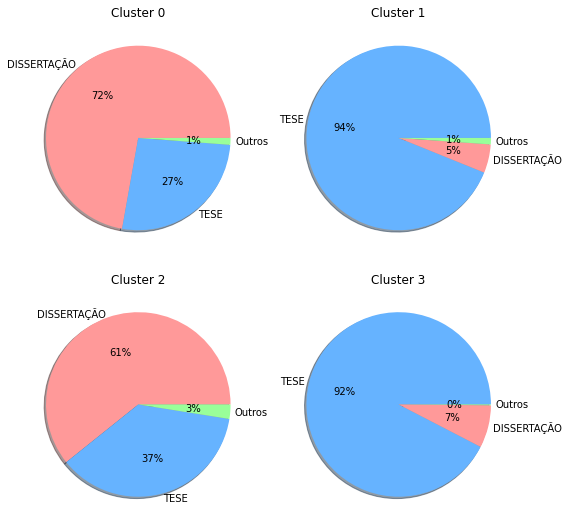

In [142]:
piechart(data,colors={'DISSERTAÇÃO':'#ff9999', 'TESE':'#66b3ff','Outros':'#99ff99'},top=2)

    O Cluster 1 tem uma quantidade considerável de "PATENTE", "REGISTRO DE PROPRIEDADE INTELECTUAL", "EDITORIA", "RELATÓRIO TÉCNICO COM REGRAS DE SIGILO", "PRODUÇÃO DE PROGRAMAS DE MÍDIA". Mas em relação a "PATENTE" o Cluster 2 também tem uma produção relativa igual ao 1.
    
    Provavelmente os Clusters 1 e 2 tem uma relação mais próxima da indústria pelo número relativo de "PRODUTO,  PROCESSO OU TÉCNICA", "PATENTES" e "RELATÓRIO TÉCNICO COM REGRAS DE SIGILO"
    
    O Cluster 0 e 2 tem predominância de "DISSERTAÇÃO" (mestrados) enquanto o 1 e 3 tem a predominância das
    "TESES" (doutorados)
    
    

In [28]:
contarvalor(df,'CS_STATUS_JURIDICO',1)

FEDERAL       57.07
ESTADUAL      24.56
PARTICULAR    17.68
MUNICIPAL      0.69
Name: CS_STATUS_JURIDICO, dtype: float64

    57,07% do universo analisado são federais, 24,56% estaduais, 17,68% particulares e apenas 0,69% municipais.

In [136]:
data=compcategorica('CS_STATUS_JURIDICO',1)
data

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
FEDERAL,70.67,60.42,0.12,66.97
ESTADUAL,27.99,34.72,0.28,31.53
MUNICIPAL,1.18,0.00,0.65,0.00
PARTICULAR,0.15,4.86,98.95,1.51


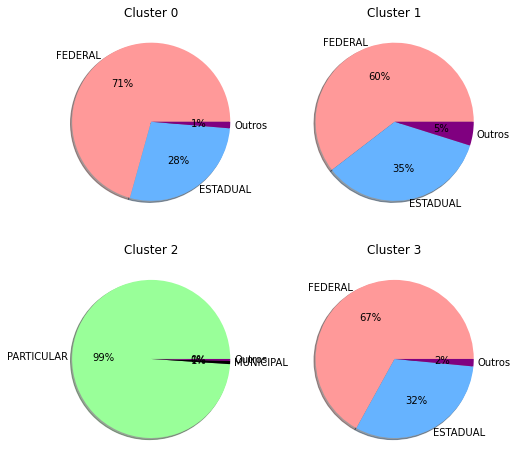

In [137]:
piechart(data,colors={'FEDERAL':'#ff9999', 'ESTADUAL':'#66b3ff','PARTICULAR':'#99ff99',
                      'MUNICIPAL':'black','Outros':'purple'},top=2)

In [31]:
compcategorica('CS_STATUS_JURIDICO',0)

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
FEDERAL,35.66,30.49,0.06,33.79
ESTADUAL,29.61,36.73,0.30,33.36
MUNICIPAL,64.48,0.00,35.52,0.00
PARTICULAR,0.14,4.61,93.82,1.43


In [32]:
compcategorica("NM_REGIAO",1)

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
SUDESTE,37.36,71.11,49.57,53.95
NORDESTE,25.81,9.17,8.22,16.99
SUL,19.16,15.69,35.11,19.15
CENTRO-OESTE,10.18,3.89,5.83,6.13
NORTE,7.49,0.14,1.27,3.79


In [33]:
compcategorica("NM_REGIAO",0)

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
SUDESTE,17.62,33.54,23.38,25.45
NORDESTE,42.88,15.24,13.66,28.23
SUL,21.50,17.61,39.40,21.49
CENTRO-OESTE,39.11,14.94,22.40,23.55
NORTE,59.02,1.10,10.01,29.87


In [34]:
compcategorica("CD_CONCEITO_PROGRAMA",1)

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
1,0.01,0.00,0.12,0.00
2,0.80,0.00,0.53,0.04
3,47.68,1.67,34.86,4.07
4,38.80,17.36,41.69,33.16
5,10.02,27.08,17.59,33.62
6,2.14,19.86,4.22,19.18
7,0.54,34.03,0.99,9.94


In [35]:
compcategorica("CD_CONCEITO_PROGRAMA",0)

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
1,7.69,0.00,92.31,0.00
2,58.39,0.00,38.69,2.92
3,54.01,1.89,39.49,4.61
4,29.62,13.25,31.82,25.31
5,11.35,30.66,19.92,38.07
6,4.71,43.74,9.30,42.25
7,1.19,74.79,2.18,21.85


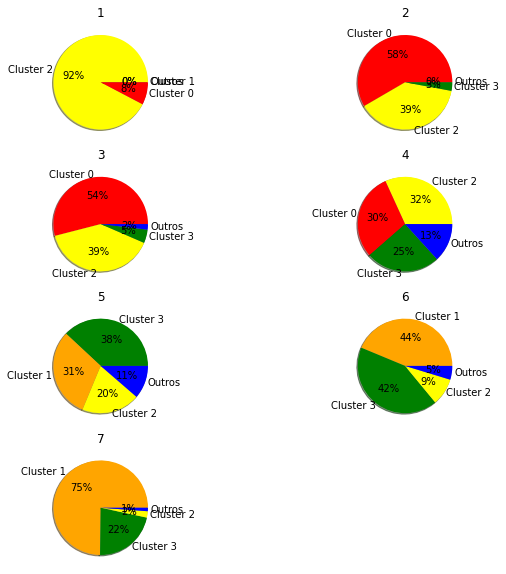

In [138]:
data = compcategorica("CD_CONCEITO_PROGRAMA",0).T
cor={'Cluster 0':'red', 'Cluster 1':'orange', 'Cluster 2':'yellow', 'Cluster 3':'green','Outros':'blue'}

piechart(data,colors=cor,top=3,figsize=(10,10))

    Os cursos com nota 1 estão concentrados no Cluster das particulares (2)

In [37]:
def discluster(SG_ENTIDADE_ENSINO):
    '''Qual a distribuição dos cursos da entidade em cada cluster?'''
    df=compcategorica('SG_ENTIDADE_ENSINO',normalize=False).fillna(0).loc[SG_ENTIDADE_ENSINO]
    df.iloc[:,]=(100*df.values/sum(df.values)).round(2)
    return df

In [38]:
discluster("UERJ")

Cluster 0    48.97
Cluster 1     7.24
Cluster 2     0.34
Cluster 3    43.45
Name: UERJ, dtype: float64

In [39]:
discluster("UNIRIO")

Cluster 0    71.91
Cluster 1     0.00
Cluster 2     0.00
Cluster 3    28.09
Name: UNIRIO, dtype: float64

In [40]:
discluster("PUC-RIO")

Cluster 0     0.00
Cluster 1     0.63
Cluster 2    82.91
Cluster 3    16.46
Name: PUC-RIO, dtype: float64

In [41]:
discluster("FGV/RJ")

Cluster 0     0.0
Cluster 1     0.0
Cluster 2    98.0
Cluster 3     2.0
Name: FGV/RJ, dtype: float64